In [1]:
import os
from return_df import create_return_df
from risk_factor_topic_util import get_persisted_hourly_weight_similarity_df
from prediction_result_df import get_classification_result_df
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
os.environ['DATA_BASE_DIR'] = 'data'
os.environ['INDEX_DIR'] = 'index'
os.environ['PRICE_DIR'] = 'price'
os.environ['CACHE_DIR'] = 'cache'
os.environ['HOURLY_WEIGHT_SIMILARITY_CACHE_FILE_NAME'] = 'hourly_weight_similarity_20'

In [4]:
def rename_columns(df):
    return df.rename(columns={'train_data_size': '#examples', 'train_accuracy': 'Train Accuracy', 'train_precision': 'Train Precision', 'train_recall': 'Train Recall', 'train_f1': 'Train F1', 'test_accuracy': 'Test Accuracy', 'test_precision': 'Test Precision', 'test_recall': 'Test Recall', 'test_f1': 'Test F1'})

    
def plot_results(results_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    metric_names = ["accuracy", "precision", "recall", "f1"]

    for idx, ax in enumerate(axes.flatten()):
        metric_name = metric_names[idx]

        ax.plot(results_df["train_data_size"], results_df[f"train_{metric_name}"], label="Training Set")
        ax.plot(results_df["train_data_size"], results_df[f"test_{metric_name}"], label="Test Set")
        ax.set_title(f"{metric_name.title()} vs. Training Data Size")
        ax.set_xlabel("Training Data Size")
        ax.set_ylabel(metric_name.title())
        ax.legend()

    plt.tight_layout()
    plt.show()

In [5]:
binary_classification_mlp_df = get_classification_result_df('binary_classification_mlp')
rename_columns(binary_classification_mlp_df)

,#examples,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,78367,0.696543,0.700776,0.744424,0.721941,0.609774,0.622803,0.664337,0.642900
1,148897,0.694829,0.714880,0.706655,0.710744,0.641025,0.661827,0.656583,0.659195
2,219427,0.699818,0.712096,0.728123,0.720020,0.657460,0.672059,0.687791,0.679834
3,289957,0.699328,0.708521,0.735356,0.721689,0.666673,0.677727,0.704690,0.690945
4,360488,0.691027,0.717149,0.688393,0.702477,0.665461,0.691150,0.664039,0.677323
5,431018,0.695906,0.724739,0.687099,0.705417,0.672357,0.700263,0.664979,0.682165
6,501548,0.688419,0.681947,0.770761,0.723639,0.667441,0.664051,0.750971,0.704841
7,572079,0.693053,0.697572,0.741018,0.718639,0.673813,0.680337,0.722636,0.700849
8,642609,0.692409,0.686051,0.771432,0.726241,0.676358,0.672484,0.756203,0.711890
9,713139,0.692357,0.696892,0.740621,0.718091,0.677171,0.683139,0.726358,0.704086


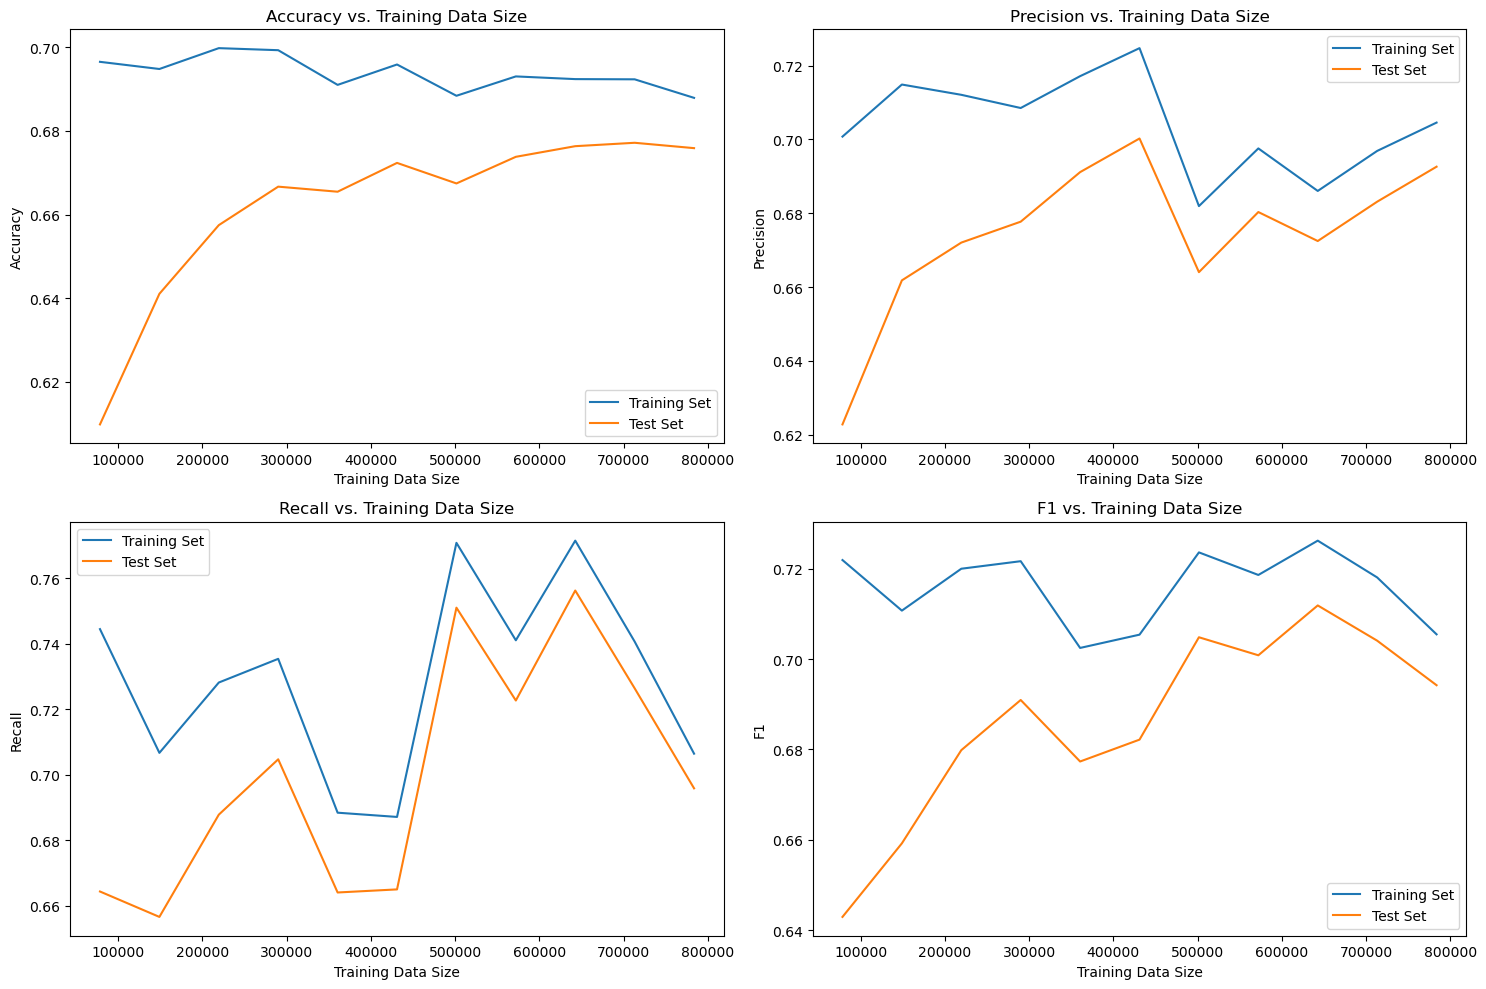

In [6]:
plot_results(binary_classification_mlp_df)

In [7]:
binary_classification_mlp_200_200_df = get_classification_result_df('binary_classification_mlp_200_200')
rename_columns(binary_classification_mlp_200_200_df)

,#examples,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,78367,0.949647,0.963329,0.940657,0.951858,0.615380,0.640786,0.620342,0.630398
1,148897,0.888500,0.890601,0.900454,0.895501,0.639224,0.656690,0.665706,0.661167
2,219427,0.853213,0.848180,0.880752,0.864160,0.654066,0.665962,0.693709,0.679552
3,289957,0.823291,0.818964,0.855864,0.837007,0.666500,0.676143,0.708738,0.692057
4,360488,0.807381,0.800286,0.848128,0.823513,0.675331,0.681979,0.723227,0.701997
5,431018,0.798145,0.804580,0.817674,0.811074,0.681938,0.695971,0.707556,0.701716
6,501548,0.789187,0.794324,0.811910,0.803021,0.686026,0.698530,0.714606,0.706476
7,572079,0.783308,0.780890,0.820631,0.800267,0.691674,0.698167,0.734360,0.715806
8,642609,0.773256,0.775370,0.804281,0.789561,0.694997,0.703772,0.730745,0.717005
9,713139,0.772502,0.792289,0.772507,0.782273,0.698760,0.721384,0.701041,0.711067


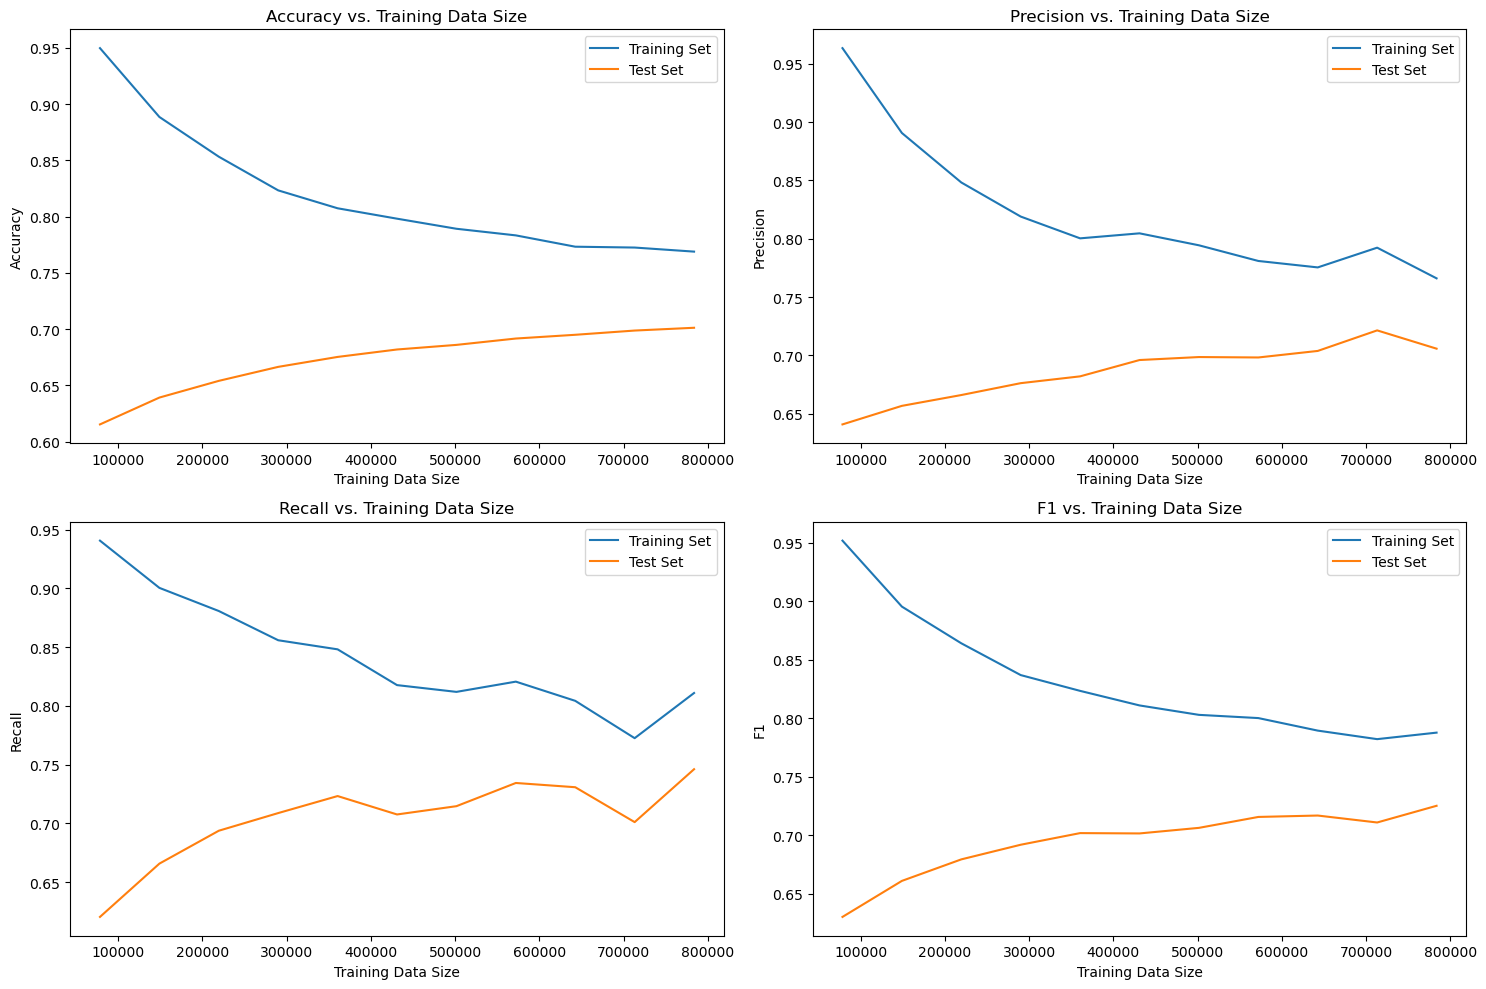

In [8]:
plot_results(binary_classification_mlp_200_200_df)